# Project Overview: Amazon Product Review Analysis & Recommendation System

This project focuses on analyzing Amazon product reviews and building a hybrid recommendation system. The workflow covers data preprocessing, exploratory analysis, sentiment analysis, feature engineering, and recommendation modeling. Below is a step-by-step summary and potential use cases.

---

## 1. **Data Loading & Preprocessing**
- **Import libraries**: pandas, numpy, seaborn, matplotlib, sklearn, nltk, textblob, etc.
- **Load dataset**: Read Amazon product review data from CSV.
- **Data cleaning**: Remove nulls, duplicates, and format price columns.
- **Text preprocessing**: Clean product names, categories, and reviews (lowercase, remove punctuation, stopwords).

## 2. **Data Exploration**
- **Feature description**: Document dataset columns and their meanings.
- **Missing value analysis**: Identify and handle missing data.
- **Category extraction**: Simplify product categories for analysis.

## 3. **Exploratory Data Analysis (EDA) & Visualization**
- **Popular products**: Identify top-selling products by rating count.
- **Category distribution**: Visualize product counts across categories.
- **Price & rating analysis**: Explore relationships between price, ratings, and popularity.

## 4. **Sentiment Analysis**
- **VADER & TextBlob**: Apply two sentiment analysis methods to review content.
- **Sentiment labeling**: Classify reviews as Positive, Neutral, or Negative.
- **Comparison**: Visualize and compare sentiment results from both methods.

## 5. **Feature Engineering**
- **Drop irrelevant columns**: Remove unnecessary features for modeling.
- **Text vectorization**: Use TF-IDF to convert product descriptions into numerical vectors.
- **Label encoding**: Encode sentiment labels for modeling.

## 6. **Recommendation System**
- **Hybrid approach**: Combine content-based (text similarity) and collaborative filtering (user ratings).
- **Cosine similarity**: Measure product similarity based on text features.
- **Product-user matrix**: Aggregate ratings for collaborative filtering.
- **Recommendation function**: Suggest similar products using both methods.

## 7. **Model Evaluation**
- **Sample recommendations**: Test the hybrid system with sample products.
- **Export results**: Save recommended products for further use.

---

## **Potential Use Cases**

- **E-commerce platforms**: Enhance product discovery and personalized recommendations.
- **Market research**: Analyze consumer sentiment and product popularity.
- **Customer support**: Identify products with negative feedback for quality improvement.
- **Retail analytics**: Optimize inventory and pricing strategies based on review insights.
- **Product development**: Understand user needs and preferences for new product launches.

---

This end-to-end workflow demonstrates how to leverage review data for actionable insights and intelligent product recommendations, applicable to any large-scale retail or review-driven platform.

In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt



In [5]:
#Load the dataset
df = pd.read_csv("amazon.csv")
pd.set_option('display.max_colwidth', 60)
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Charging and ...,Computers&Accessories|Accessories&Peripherals|Cables&Acc...,₹399,"₹1,099",64%,4.2,"24,269","High Compatibility : Compatible With iPhone 12, 11, X/Xs...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONIL...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0O...","Satisfied,Charging is really fast,Value for money,Produc...","Looks durable Charging is fine tooNo complains,Charging ...",https://m.media-amazon.com/images/W/WEBP_402378-T1/image...,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Char...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided ...,Computers&Accessories|Accessories&Peripherals|Cables&Acc...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be it an and...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525A...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,Bh...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RYGGS0M09S3K...","A Good Braided Cable for Your Type C Device,Good quality...",I ordered this cable to connect my phone to Android Auto...,https://m.media-amazon.com/images/W/WEBP_402378-T2/image...,https://www.amazon.in/Ambrane-Unbreakable-Charging-Braid...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync USB Cable C...,Computers&Accessories|Accessories&Peripherals|Cables&Acc...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safety proctect...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQLWQOWZ4N3O...","Kunal,Himanshu,viswanath,sai niharka,saqib malik,Aashiq,...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R25X4TBMPY91...","Good speed for earlier versions,Good Product,Working goo...","Not quite durable and sturdy,https://m.media-amazon.com/...",https://m.media-amazon.com/images/W/WEBP_402378-T1/image...,https://www.amazon.in/Sounce-iPhone-Charging-Compatible-...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resi...,Computers&Accessories|Accessories&Peripherals|Cables&Acc...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compatible with s...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5SGCUQBP7YSC...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh chouhan,Ra...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1CLH2ULIVG5...","Good product,Good one,Nice,Really nice product,Very firs...","Good product,long wire,Charges good,Nice,I bought this c...",https://m.media-amazon.com/images/I/41V5FtEWPkL._SX300_S...,https://www.amazon.in/Deuce-300-Resistant-Tangle-Free-Tr...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cab...,Computers&Accessories|Accessories&Peripherals|Cables&Acc...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes with charging...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZHM4QB2KPKFU...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK,Bhargav,D...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R3KK4GT934S...","As good as original,Decent,Good one for secondary use,Be...","Bought this instead of original apple, does the work for...",https://m.media-amazon.com/images/W/WEBP_402378-T2/image...,https://www.amazon.in/Portronics-Konnect-POR-1080-Chargi...


# Data preprocessing


### Data Preprocessing Overview

The data preprocessing steps for the Amazon Product Review Analysis project included:

1. **Missing Value Removal:** All rows with missing values were dropped to ensure data completeness.
2. **Duplicate Removal:** Duplicate rows were eliminated to maintain data integrity.
3. **Price Cleaning:** Price columns were cleaned by removing currency symbols and commas, then converted to float for numerical analysis.
4. **Category Simplification:** Product categories were simplified by extracting the top-level category.
5. **Text Cleaning:** Product names, categories, and reviews were preprocessed by converting to lowercase, removing punctuation, and filtering out stopwords.
6. **Type Conversion:** The `rating_count` column was converted to numeric to facilitate analysis.

These steps ensured the dataset was clean, consistent, and ready for further analysis and modeling.
"""
print(preprocessing_overview)

In [6]:
data = {
    'Feature Name': ['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 
                     'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 
                     'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link'],
    'Data Type': ['object'] * 16,
    'Description': [
        'Unique identifier for each product',
        'Name of the product',
        'Category to which the product belongs',
        'Discounted price of the product',
        'Original price of the product before discounts',
        'Percentage of the discount provided on the product',
        'Average rating given to the product by users',
        'Number of users who have rated the product',
        'Description or details about the product',
        'Unique identifier for the user who wrote the review',
        'Name of the user who wrote the review',
        'Unique identifier for each user review',
        'Short title or summary of the user review',
        'Full content of the user review',
        'URL link to the product\'s image',
        'URL link to the product\'s page on Amazon\'s official website'
    ]
}

descriptive_df = pd.DataFrame(data)
descriptive_df

,Feature Name,Data Type,Description
0,product_id,object,Unique identifier for each product
1,product_name,object,Name of the product
2,category,object,Category to which the product belongs
3,discounted_price,object,Discounted price of the product
4,actual_price,object,Original price of the product before discounts
5,discount_percentage,object,Percentage of the discount provided on the product
6,rating,object,Average rating given to the product by users
7,rating_count,object,Number of users who have rated the product
8,about_product,object,Description or details about the product
9,user_id,object,Unique identifier for the user who wrote the review


In [7]:
print(df.isnull().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [8]:
df = df.dropna()

In [9]:
df = df.drop_duplicates()

In [10]:
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

In [11]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Charging and ...,Computers&Accessories|Accessories&Peripherals|Cables&Acc...,399.0,1099.0,64%,4.2,"24,269","High Compatibility : Compatible With iPhone 12, 11, X/Xs...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONIL...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0O...","Satisfied,Charging is really fast,Value for money,Produc...","Looks durable Charging is fine tooNo complains,Charging ...",https://m.media-amazon.com/images/W/WEBP_402378-T1/image...,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Char...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided ...,Computers&Accessories|Accessories&Peripherals|Cables&Acc...,199.0,349.0,43%,4.0,"43,994","Compatible with all Type C enabled devices, be it an and...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525A...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,Bh...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RYGGS0M09S3K...","A Good Braided Cable for Your Type C Device,Good quality...",I ordered this cable to connect my phone to Android Auto...,https://m.media-amazon.com/images/W/WEBP_402378-T2/image...,https://www.amazon.in/Ambrane-Unbreakable-Charging-Braid...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync USB Cable C...,Computers&Accessories|Accessories&Peripherals|Cables&Acc...,199.0,1899.0,90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safety proctect...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQLWQOWZ4N3O...","Kunal,Himanshu,viswanath,sai niharka,saqib malik,Aashiq,...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R25X4TBMPY91...","Good speed for earlier versions,Good Product,Working goo...","Not quite durable and sturdy,https://m.media-amazon.com/...",https://m.media-amazon.com/images/W/WEBP_402378-T1/image...,https://www.amazon.in/Sounce-iPhone-Charging-Compatible-...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resi...,Computers&Accessories|Accessories&Peripherals|Cables&Acc...,329.0,699.0,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compatible with s...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5SGCUQBP7YSC...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh chouhan,Ra...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1CLH2ULIVG5...","Good product,Good one,Nice,Really nice product,Very firs...","Good product,long wire,Charges good,Nice,I bought this c...",https://m.media-amazon.com/images/I/41V5FtEWPkL._SX300_S...,https://www.amazon.in/Deuce-300-Resistant-Tangle-Free-Tr...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cab...,Computers&Accessories|Accessories&Peripherals|Cables&Acc...,154.0,399.0,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes with charging...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZHM4QB2KPKFU...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK,Bhargav,D...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R3KK4GT934S...","As good as original,Decent,Good one for secondary use,Be...","Bought this instead of original apple, does the work for...",https://m.media-amazon.com/images/W/WEBP_402378-T2/image...,https://www.amazon.in/Portronics-Konnect-POR-1080-Chargi...


In [12]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Charging and ...,Computers&Accessories|Accessories&Peripherals|Cables&Acc...,399.0,1099.0,64%,4.2,"24,269","High Compatibility : Compatible With iPhone 12, 11, X/Xs...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONIL...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0O...","Satisfied,Charging is really fast,Value for money,Produc...","Looks durable Charging is fine tooNo complains,Charging ...",https://m.media-amazon.com/images/W/WEBP_402378-T1/image...,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Char...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided ...,Computers&Accessories|Accessories&Peripherals|Cables&Acc...,199.0,349.0,43%,4.0,"43,994","Compatible with all Type C enabled devices, be it an and...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525A...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,Bh...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RYGGS0M09S3K...","A Good Braided Cable for Your Type C Device,Good quality...",I ordered this cable to connect my phone to Android Auto...,https://m.media-amazon.com/images/W/WEBP_402378-T2/image...,https://www.amazon.in/Ambrane-Unbreakable-Charging-Braid...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync USB Cable C...,Computers&Accessories|Accessories&Peripherals|Cables&Acc...,199.0,1899.0,90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safety proctect...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQLWQOWZ4N3O...","Kunal,Himanshu,viswanath,sai niharka,saqib malik,Aashiq,...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R25X4TBMPY91...","Good speed for earlier versions,Good Product,Working goo...","Not quite durable and sturdy,https://m.media-amazon.com/...",https://m.media-amazon.com/images/W/WEBP_402378-T1/image...,https://www.amazon.in/Sounce-iPhone-Charging-Compatible-...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resi...,Computers&Accessories|Accessories&Peripherals|Cables&Acc...,329.0,699.0,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compatible with s...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5SGCUQBP7YSC...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh chouhan,Ra...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1CLH2ULIVG5...","Good product,Good one,Nice,Really nice product,Very firs...","Good product,long wire,Charges good,Nice,I bought this c...",https://m.media-amazon.com/images/I/41V5FtEWPkL._SX300_S...,https://www.amazon.in/Deuce-300-Resistant-Tangle-Free-Tr...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cab...,Computers&Accessories|Accessories&Peripherals|Cables&Acc...,154.0,399.0,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes with charging...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZHM4QB2KPKFU...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK,Bhargav,D...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R3KK4GT934S...","As good as original,Decent,Good one for secondary use,Be...","Bought this instead of original apple, does the work for...",https://m.media-amazon.com/images/W/WEBP_402378-T2/image...,https://www.amazon.in/Portronics-Konnect-POR-1080-Chargi...


In [13]:
#Extracting the top-level category
df['category'] = df['category'].apply(lambda x: x.split('|')[0] if pd.notnull(x) else x)

In [14]:
# Cleaning and preprocessing text without lemmatization
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    # Split text into words and rejoin without stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Assuming df is your DataFrame and it has been previously loaded
# Apply the clean_text function to the DataFrame columns
df['product_name'] = df['product_name'].apply(clean_text)
df['about_product'] = df['about_product'].apply(clean_text)
df['review_content'] = df['review_content'].apply(clean_text)
df['category'] = df['category'].apply(clean_text)

In [15]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,wayona nylon braided usb lightning fast charging data sy...,computersaccessories,399.0,1099.0,64%,4.2,"24,269",high compatibility compatible iphone 12 11 xxsmaxxr ipho...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONIL...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0O...","Satisfied,Charging is really fast,Value for money,Produc...",looks durable charging fine toono complainscharging real...,https://m.media-amazon.com/images/W/WEBP_402378-T1/image...,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Char...
1,B098NS6PVG,ambrane unbreakable 60w 3a fast charging 15m braided typ...,computersaccessories,199.0,349.0,43%,4.0,"43,994",compatible type c enabled devices android smartphone mi ...,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525A...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,Bh...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RYGGS0M09S3K...","A Good Braided Cable for Your Type C Device,Good quality...",ordered cable connect phone android auto car cable reall...,https://m.media-amazon.com/images/W/WEBP_402378-T2/image...,https://www.amazon.in/Ambrane-Unbreakable-Charging-Braid...
2,B096MSW6CT,sounce fast phone charging cable data sync usb cable com...,computersaccessories,199.0,1899.0,90%,3.9,"7,928",fast charger data syncwith builtin safety proctections f...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQLWQOWZ4N3O...","Kunal,Himanshu,viswanath,sai niharka,saqib malik,Aashiq,...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R25X4TBMPY91...","Good speed for earlier versions,Good Product,Working goo...",quite durable sturdyhttpsmmediaamazoncomimageswwebp40237...,https://m.media-amazon.com/images/W/WEBP_402378-T1/image...,https://www.amazon.in/Sounce-iPhone-Charging-Compatible-...
3,B08HDJ86NZ,boat deuce usb 300 2 1 typec micro usb stress resistant ...,computersaccessories,329.0,699.0,53%,4.2,"94,363",boat deuce usb 300 2 1 cable compatible smartphones tabl...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5SGCUQBP7YSC...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh chouhan,Ra...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1CLH2ULIVG5...","Good product,Good one,Nice,Really nice product,Very firs...",good productlong wirecharges goodnicei bought cable rs33...,https://m.media-amazon.com/images/I/41V5FtEWPkL._SX300_S...,https://www.amazon.in/Deuce-300-Resistant-Tangle-Free-Tr...
4,B08CF3B7N1,portronics konnect l 12m fast charging 3a 8 pin usb cabl...,computersaccessories,154.0,399.0,61%,4.2,"16,905",charge sync function cable comes charging data sync func...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZHM4QB2KPKFU...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK,Bhargav,D...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R3KK4GT934S...","As good as original,Decent,Good one for secondary use,Be...",bought instead original apple work 150rs fast apple char...,https://m.media-amazon.com/images/W/WEBP_402378-T2/image...,https://www.amazon.in/Portronics-Konnect-POR-1080-Chargi...


In [16]:
# Convert rating_count to numeric, coercing errors to NaN
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

In [17]:
unique_products = df['product_id'].nunique()
avg_price = df['actual_price'].mean()
best_selling_product = df.loc[df['rating_count'].idxmax()]
least_selling_product = df.loc[df['rating_count'].idxmin()]
top_rated_product = df.loc[df['rating'].idxmax()]
lowest_rated_product = df.loc[df['rating'].idxmin()]
most_expensive_product = df.loc[df['actual_price'].idxmax()]
cheapest_product = df.loc[df['actual_price'].idxmin()]
highest_discount_product = df.loc[df['discount_percentage'].idxmax()]
avg_rating = df.groupby('product_id')['rating_count'].mean().mean()

df_anl = pd.DataFrame({
    'Question': [
        'Number of Unique Products',
        'Average Price',
        'Best-selling Product',
        'Least-selling Product',
        'Top-rated Product',
        'Lowest-rated Product',
        'Most Expensive Product',
        'Cheapest Product',
        'Highest Discount Product',
        'Average Rating Count for Each Product'
    ],
    'Answer': [
        unique_products,
        avg_price,
        best_selling_product['product_name'],
        least_selling_product['product_name'],
        top_rated_product['product_name'],
        lowest_rated_product['product_name'],
        most_expensive_product['product_name'],
        cheapest_product['product_name'],
        highest_discount_product['product_name'],
        avg_rating
    ],
    'Actual Price': [
        None,
        None,
        best_selling_product['actual_price'],
        least_selling_product['actual_price'],
        top_rated_product['actual_price'],
        lowest_rated_product['actual_price'],
        most_expensive_product['actual_price'],
        cheapest_product['actual_price'],
        highest_discount_product['actual_price'],
        None
    ]
})

df_anl

,Question,Answer,Actual Price
0,Number of Unique Products,1349,NaN
1,Average Price,5451.068544,NaN
2,Best-selling Product,eureka forbes car vac 100 watts powerful suction vacuum ...,2499.0
3,Least-selling Product,khaitan orfin fan heater home kitchenk0 2215,2495.0
4,Top-rated Product,eureka forbes car vac 100 watts powerful suction vacuum ...,2499.0
5,Lowest-rated Product,khaitan orfin fan heater home kitchenk0 2215,2495.0
6,Most Expensive Product,sony bravia 164 cm 65 inches 4k ultra hd smart led googl...,139900.0
7,Cheapest Product,ecosmos 5v 12w portable flexible usb led light colours m...,39.0
8,Highest Discount Product,rts 2 pack mini usb c type c adapter plug type c female ...,4999.0
9,Average Rating Count for Each Product,341.76461,NaN


# Exploratory Data Analysis (EDA) and Visualization



This notebook performs comprehensive Exploratory Data Analysis (EDA) on Amazon product reviews to uncover key insights and trends:

- **Popular Products:** Identified the top 10 best-selling products based on rating count, visualized their dominance compared to the rest of the catalog.
- **Category Distribution:** Analyzed and visualized the distribution of products across major categories such as electronics, computers & accessories, and home & kitchen.
- **Price & Rating Relationships:** Explored how actual price, discounted price, product ratings, and popularity (rating count) interact using scatter plots and summary statistics.
- **Category Insights:** Extracted and ranked product categories by count to highlight the most represented segments.
- **Sentiment Analysis:** Applied VADER and TextBlob sentiment analysis to review content, compared results, and visualized sentiment distribution.
- **Descriptive Statistics:** Calculated metrics such as average price, average rating count, most/least expensive products, and best/least selling products.

These EDA steps provide a strong foundation for understanding product performance, customer preferences, and sentiment trends, enabling effective feature engineering and recommendation modeling.

In [18]:
# Top 10 most popular products by rating_count
top_10_popular = df.nlargest(10, 'rating_count')[['product_id', 'product_name', 'rating_count', 'actual_price']]
top_10_popular

,product_id,product_name,rating_count,actual_price
1279,B08L12N5H1,eureka forbes car vac 100 watts powerful suction vacuum ...,992.0,2499.0
750,B00ZRBWPA0,eveready red 1012 aaa batteries pack 10,989.0,180.0
1059,B09Y5FZK9N,pigeon 15 litre hot kettle stainless steel water bottle ...,976.0,1545.0
32,B08QSC1XY8,zoul usb c 60w fast charging 3a 6ft2m long type c nylon ...,974.0,1099.0
151,B08QSDKFGQ,zoul usb type c fast charging 3a nylon braided data cabl...,974.0,1099.0
823,B08QSC1XY8,zoul usb c 60w fast charging 3a 6ft2m long type c nylon ...,974.0,1099.0
1272,B09N3BFP4M,bajaj new shakti neo plus 15 litre 4 star rated storage ...,959.0,11500.0
1259,B0BCKJJN8R,hindware atlantic xceed 5l 3kw instant water heater copp...,942.0,7290.0
214,B0841KQR1Z,crypo universal remote compatible tata sky universal hd ...,928.0,999.0
1262,B08C7TYHPB,ibell castor ctek15l premium 15 litre stainless steel el...,925.0,1490.0


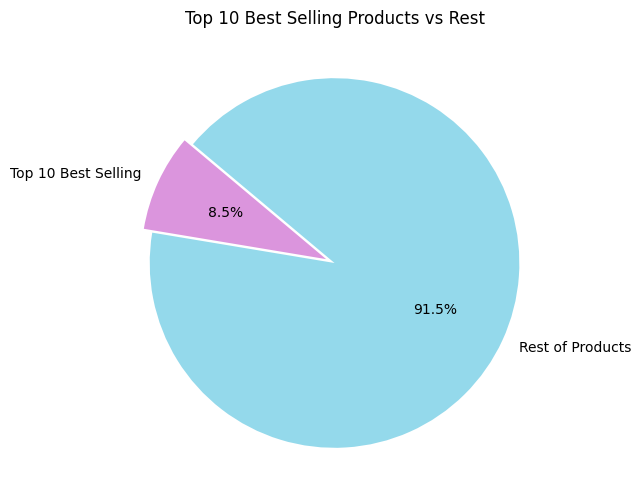

In [19]:
import matplotlib.pyplot as plt

# Calculate total rating_count for top 10 and rest
top_10_total = top_10_popular['rating_count'].sum()
rest_total = df['rating_count'].sum() - top_10_total

labels = ['Top 10 Best Selling', 'Rest of Products']
sizes = [top_10_total, rest_total]
colors = ["#db95dd","#94d9eb"]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.05, 0))
plt.title('Top 10 Best Selling Products vs Rest')
plt.show()

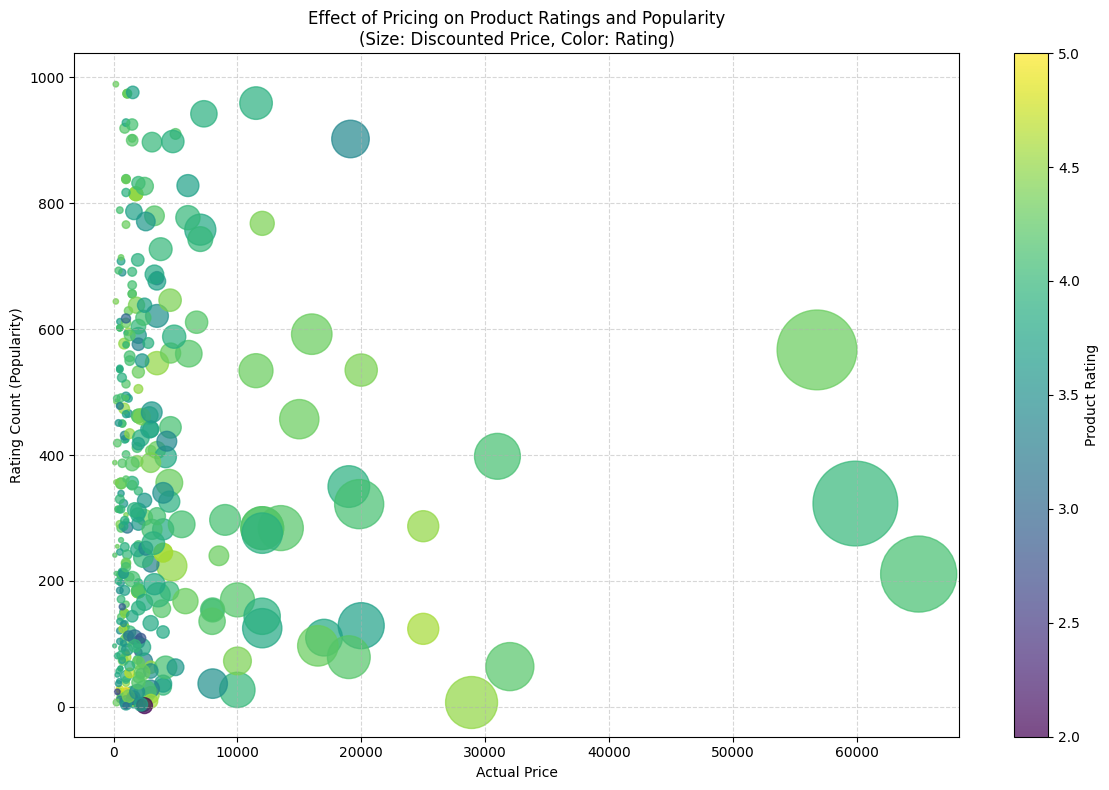

In [20]:
import seaborn as sns

# Prepare data for visualization
plot_df = df[['actual_price', 'discounted_price', 'rating', 'rating_count']].copy()
plot_df['rating'] = pd.to_numeric(plot_df['rating'], errors='coerce')

# Remove rows with missing values in relevant columns
plot_df = plot_df.dropna(subset=['actual_price', 'discounted_price', 'rating', 'rating_count'])

plt.figure(figsize=(12, 8))

# Scatter plot: Actual Price vs Rating Count, colored by Rating, size by Discounted Price
scatter = plt.scatter(
    plot_df['actual_price'],
    plot_df['rating_count'],
    c=plot_df['rating'],
    s=plot_df['discounted_price'] / 10,  # scale for visibility
    cmap='viridis',
    alpha=0.7
)

plt.colorbar(scatter, label='Product Rating')
plt.xlabel('Actual Price')
plt.ylabel('Rating Count (Popularity)')
plt.title('Effect of Pricing on Product Ratings and Popularity\n(Size: Discounted Price, Color: Rating)')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [21]:
# Top categories based on the number of products
from collections import Counter  # Add this import

categories = df['category'].str.split('|').explode()
category_counts = Counter(categories)
category_df = pd.DataFrame(category_counts.items(), columns=['Category', 'Count']).sort_values(by='Count', ascending=False)

# Display the top categories
top_categories = category_df.head(10)
top_categories.reset_index(drop=True, inplace=True)
top_categories

,Category,Count
0,electronics,526
1,computersaccessories,451
2,homekitchen,448
3,officeproducts,31
4,musicalinstruments,2
5,homeimprovement,2
6,toysgames,1
7,carmotorbike,1
8,healthpersonalcare,1


# Sentiment analysis

### Why Sentiment Analysis is Important for Amazon Product Review Analysis

Sentiment analysis is a crucial step in this project because it enables us to quantitatively assess customer opinions and emotions expressed in product reviews. By classifying reviews as positive, neutral, or negative, we gain valuable insights into overall customer satisfaction, product strengths, and areas needing improvement. This information helps:

- **Enhance Recommendations:** Sentiment scores can be integrated into recommendation algorithms to suggest products with consistently positive feedback.
- **Identify Issues Early:** Negative sentiment trends highlight products with potential quality or service problems, enabling proactive intervention.
- **Understand Customer Preferences:** Analyzing sentiment across categories reveals what features or attributes customers value most.
- **Support Data-Driven Decisions:** Retailers and manufacturers can use sentiment insights to guide product development, marketing strategies, and inventory management.

Overall, sentiment analysis transforms unstructured review text into actionable intelligence, making it an essential component of effective product review analysis and recommendation systems.

In [22]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon if not already present
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on review_content column
df['sentiment_score'] = df['review_content'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Display sentiment statistics
print(df['sentiment_score'].describe())
df[['review_content', 'sentiment_score']].head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


count    1463.000000
mean        0.882479
std         0.253359
min        -0.906900
25%         0.906200
50%         0.964300
75%         0.986550
max         0.999800
Name: sentiment_score, dtype: float64


,review_content,sentiment_score
0,looks durable charging fine toono complainscharging real...,0.9240
1,ordered cable connect phone android auto car cable reall...,0.9744
2,quite durable sturdyhttpsmmediaamazoncomimageswwebp40237...,0.6808
3,good productlong wirecharges goodnicei bought cable rs33...,0.9371
4,bought instead original apple work 150rs fast apple char...,0.9933


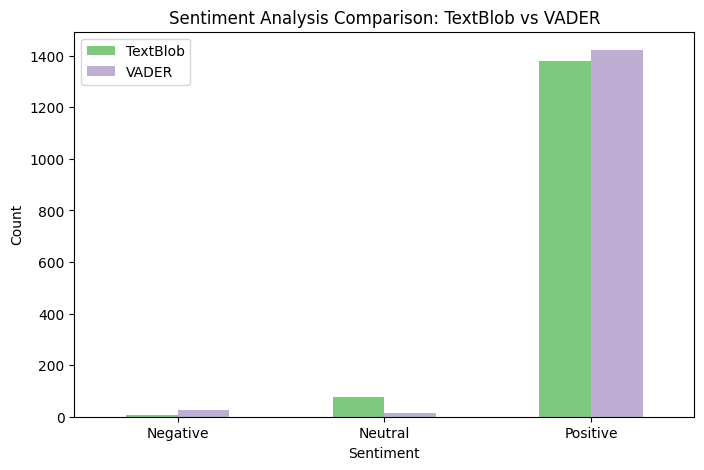

In [23]:
from textblob import TextBlob

# Perform sentiment classification
def sentiment_analysis(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.1:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to review_content
df['sentiment_label'] = df['review_content'].apply(sentiment_analysis)

# Comparative visualization: TextBlob vs VADER
sentiment_counts_textblob = df['sentiment_label'].value_counts()
sentiment_counts_vader = pd.Series({
    'Positive': (df['sentiment_score'] > 0.1).sum(),
    'Negative': (df['sentiment_score'] < -0.1).sum(),
    'Neutral': ((df['sentiment_score'] >= -0.1) & (df['sentiment_score'] <= 0.1)).sum()
})

# Combine for comparison
comparison_df = pd.DataFrame({
    'TextBlob': sentiment_counts_textblob,
    'VADER': sentiment_counts_vader
})

comparison_df.plot(kind='bar', figsize=(8,5), color=['#7fc97f', '#beaed4'])
plt.title('Sentiment Analysis Comparison: TextBlob vs VADER')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Feature Engineering¶



Feature engineering transforms raw data into meaningful features for modeling and recommendations. In this notebook, the following steps were performed:

1. **Dropping Irrelevant Columns**:
    - Columns such as 'discounted_price', 'actual_price', 'discount_percentage', 'review_id', 'review_title', 'user_name', 'img_link', and 'product_link' were dropped.
    - **Reason**: These columns do not contribute directly to product similarity or sentiment analysis. Removing them reduces noise, simplifies the dataset, and improves model efficiency.

2. **Text Feature Creation**:
    - Merged 'product_name', 'category', and 'about_product' into a single 'product_text' column.
    - **Reason**: Combining relevant textual information provides a comprehensive representation for content-based recommendations.

3. **Text Vectorization**:
    - Used TF-IDF vectorization on 'product_text' to convert text into numerical features.
    - **Reason**: TF-IDF captures important keywords and enables similarity calculations between products.

4. **Sentiment Encoding**:
    - Encoded sentiment labels and scores for use in modeling.
    - **Reason**: Numerical encoding allows sentiment information to be used in machine learning algorithms.

**Summary**: Dropping irrelevant columns focuses the analysis on features that matter for recommendations and sentiment analysis, while engineered features (like TF-IDF vectors and sentiment encodings) enable effective modeling and similarity calculations.

In [24]:
drop_col = ['discounted_price', 'actual_price', 'discount_percentage', 'review_id', 'review_title',
                   'user_name', 'img_link', 'product_link']
df = df.drop(columns=drop_col)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Merge text columns to form a comprehensive representation
df['product_text'] = df['product_name'] + ' ' + df['category'] + ' ' + df['about_product']

# Vectorize the merged text using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
product_vectors = vectorizer.fit_transform(df['product_text'])

# product_vectors is a sparse matrix of shape (n_samples, n_features)
product_vectors

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 65012 stored elements and shape (1463, 1000)>

In [26]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Encode sentiment_label column
df['sentiment_encoded'] = le.fit_transform(df['sentiment_label'])

# Encode sentiment_score as categorical (Positive/Neutral/Negative)
def score_to_label(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_score_label'] = df['sentiment_score'].apply(score_to_label)
df['sentiment_score_encoded'] = le.fit_transform(df['sentiment_score_label'])

df[['sentiment_label', 'sentiment_encoded', 'sentiment_score_label', 'sentiment_score_encoded']].head()

,sentiment_label,sentiment_encoded,sentiment_score_label,sentiment_score_encoded
0,Positive,2,Positive,2
1,Positive,2,Positive,2
2,Positive,2,Positive,2
3,Positive,2,Positive,2
4,Positive,2,Positive,2


In [27]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity matrix for product_vectors
cosine_sim_matrix = cosine_similarity(product_vectors)

# Display shape of the similarity matrix
print("Cosine similarity matrix shape:", cosine_sim_matrix.shape)

Cosine similarity matrix shape: (1463, 1463)


In [28]:
# Ensure 'rating' column is numeric before creating the pivot table
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Now create the product-user matrix with mean aggregation
product_user_matrix = df.pivot_table(index='product_id', values='rating', aggfunc='mean')

# Fill missing values with the average rating
product_user_matrix = product_user_matrix.fillna(product_user_matrix['rating'].mean())

# Display the product-user matrix
product_user_matrix.head()

,rating
product_id,
B002PD61Y4,4.1
B002SZEOLG,4.2
B003B00484,4.3
B003L62T7W,4.3
B004IO5BMQ,4.5


# Hybrid Recommendation System



A **hybrid recommendation system** combines multiple recommendation techniques to deliver more accurate and relevant product suggestions. In this Amazon Product Review Analysis project, the hybrid system leverages both **content-based filtering** and **collaborative filtering** to recommend products.

### How the Hybrid System Works

1. **Content-Based Filtering**
    - Uses product features (e.g., name, category, description) to find similar items.
    - Text data is merged and vectorized using TF-IDF, capturing important keywords.
    - Cosine similarity measures how closely products resemble each other based on their textual features.

2. **Collaborative Filtering**
    - Utilizes user ratings to identify products with similar popularity or satisfaction.
    - Builds a product-user matrix, aggregating ratings for each product.
    - Finds products with ratings closest to the target product, reflecting user preferences.

3. **Combining Recommendations**
    - Both methods generate lists of recommended products.
    - The system merges these lists, removing duplicates, to provide a diverse set of suggestions.

### Why Use a Hybrid System?

- **Improved Accuracy:** Combines strengths of both methods, reducing limitations of each.
- **Personalization:** Accounts for both product similarity and user preferences.
- **Robustness:** Handles cases where rating data is sparse or new products lack reviews.
- **Diversity:** Offers recommendations that are relevant in multiple ways (feature similarity and popularity).



In [29]:
def hybrid_recommendation(product_id, content_sim_matrix, product_user_matrix, products, top_n=10):

    # Find the index of the product in the DataFrame using its product_id
    idx = products.index[products['product_id'] == product_id][0]

    # --- Content-Based Filtering ---
    # Compute similarity scores between the target product and all other products
    sim_scores = list(enumerate(content_sim_matrix[idx]))
    # Sort all products by their similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select indices of the top N most similar products (excluding the target itself)
    content_recommendations_idx = [i[0] for i in sim_scores[1:top_n+1]]

    # --- Collaborative Filtering ---
    # Check if the product exists in the product-user matrix
    if product_id in product_user_matrix.index:
        # Get the average rating for the target product
        current_product_rating = product_user_matrix.loc[product_id].values[0]
        # Find products with ratings closest to the target product's rating
        similar_rating_products = product_user_matrix.iloc[
            (product_user_matrix['rating'] - current_product_rating).abs().argsort()[:top_n]
        ]

    # Get indices of collaborative recommendations by mapping product_ids to DataFrame indices
    collaborative_recommendations_idx = similar_rating_products.index
    collaborative_recommendations_idx = [
        products.index[products['product_id'] == pid].tolist()[0] for pid in collaborative_recommendations_idx
    ]

    # --- Combine Recommendations ---
    # Merge indices from both methods and remove duplicates to avoid recommending the same product twice
    combined_indices = list(set(content_recommendations_idx + collaborative_recommendations_idx))

    # Retrieve product details for the recommended products
    recommended_products = products.iloc[combined_indices].copy()
    # Select only relevant columns for display
    recommended_products = recommended_products[['product_id', 'product_name', 'rating']]
    
    return recommended_products

# Model evaluation

In [30]:
# Evaluate the hybrid recommendation model

# Select a sample product_id to test recommendations
sample_product_id = df.iloc[0]['product_id']

# Get recommendations using the hybrid system
recommended_products = hybrid_recommendation(
    product_id=sample_product_id,
    content_sim_matrix=cosine_sim_matrix,
    product_user_matrix=product_user_matrix,
    products=df,
    top_n=10
)

# Display the recommended products
recommended_products.head()

,product_id,product_name,rating
261,B07F1P8KNV,wayona nylon braided usb type c 3ft 1m 3a fast charger c...,4.2
8,B008IFXQFU,tplink usb wifi adapter pctlwn725n n150 wireless network...,4.2
143,B002SZEOLG,tplink nano usb wifi dongle 150mbps high gain wireless n...,4.2
148,B005LJQMCK,bluerigger digital optical audio toslink cable 33 feet 1...,4.2
1443,B09H7JDJCW,philips drip coffee maker hd743220 06 l ideal 27 cups bl...,4.0


In [31]:
recommended_products.to_csv("recommended_products.csv", index=False)

### Key Steps in This Project

1. **Preprocess Data:** Clean text, encode sentiment, and prepare product features.
2. **Vectorize Product Text:** Use TF-IDF to create numerical representations for content-based filtering.
3. **Build Product-User Matrix:** Aggregate ratings for collaborative filtering.
4. **Compute Similarities:** Calculate cosine similarity for product features.
5. **Generate Recommendations:** Use both filtering methods and combine results.
6. **Evaluate Model:** Test recommendations and export results for further use.

**Summary:**  
The hybrid recommendation system in this project ensures users receive suggestions that are both similar in content and popular among other users, leading to a more satisfying and effective product discovery experience.